In [125]:
import warnings
warnings.filterwarnings('ignore')
import pyodbc
from functools import reduce
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn import linear_model

import math
from datetime import date
import statistics
import seaborn as sb

import seaborn as sns
%matplotlib inline
import scipy as sp
from scipy import stats
import statsmodels

import xgboost as xgb
from pandas import Series
from pandas import read_csv
import scipy.stats.stats as stats
import re
import traceback
import string

import pickle

import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

import scipy as sp
from scipy import stats


from matplotlib import pyplot
import matplotlib.animation as animation

from statsmodels.graphics.tsaplots import plot_acf
import statsmodels
import pandas.core.algorithms as algos
from statsmodels.stats.outliers_influence import variance_inflation_factor

plt.rcParams["figure.figsize"] = (30,6)
plt.rcParams['axes.grid'] = True

In [ ]:
import pyodbc
server = 'frydai.database.windows.net'
database = 'frydai_db'
username = 'DABI_readonly'
password = 'dbLOGIN_22!{Mar).' 
driver= '{SQL Server Native Client 11.0}'
with pyodbc.connect('DRIVER='+driver+';SERVER=tcp:'+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password) as conn:
    with conn.cursor() as cursor:
        for row in cursor.tables():
            print(row.table_name)

In [ ]:
# Data Extraction
admissions_data = pd.read_sql('SELECT * From admissions', conn)
diagnosis_data = pd.read_sql('SELECT * From diagnosis', conn)
patients_data = pd.read_sql('SELECT * From patients', conn)
conn.close()

In [ ]:
# extracted data writing to CSV file
admissions_data.to_csv("D:/assignment/Dissertation/data/admissions.csv")
diagnosis_data.to_csv("D:/assignment/Dissertation/data/diagnosis.csv")
patients_data.to_csv("D:/assignment/Dissertation/data/patients.csv")

In [ ]:
# Reading and storing the CSV data in data frame.
df = pd.read_csv('D:/assignment/Dissertation/data/admissions.csv')
df1 = pd.read_csv('D:/assignment/Dissertation/data/diagnosis.csv')
df2 = pd.read_csv('D:/assignment/Dissertation/data/patients.csv')

In [ ]:
print(df.columns.values)
print(df1.columns.values)
print(df2.columns.values)

In [126]:
#reading all Three csv files and merged into single Csv file based on the patient id.
df = pd.read_csv('admissions.csv')
df1 = pd.read_csv('diagnosis.csv')
df2 = pd.read_csv('patients.csv')

df_t = reduce(lambda x,y: pd.merge(x,y, on='PATIENT_ID', how='outer'), [df, df1, df2])
df_t = df_t.iloc[:,1:]
df_t = df_t.drop(['Unnamed: 0_y'], axis = 1)
df_t = df_t.drop(['Unnamed: 0'], axis = 1)
df_t

,PATIENT_ID,Presentation with a hip fracture via A&E,Presentation to A&E or Trauma Team,Admission to OW,Admission to OW date,Residence before admission,Pre-fracture mobility,AMTS pre-op,Nutritional assessment,Delirium Assessment Not Done,...,Diag9Desc,Diag10,Diag10Desc,HOSPITAL_ID,SEX,BIRTH_DATE,DEATH_DATE,CIVIL_STATUS,ETHNICITY,NEXT_OF_KIN
0,87143.0,NaN,2021-03-04 00:00:00,Yes,2021-03-04 00:00:00,Own home/sheltered housing,Freely mobile without aids,10.0,Yes - assessment indicates normal,NaN,...,NaN,NaN,NaN,837073.0,Male,1939-09-17,NaN,Married/Civil Partnership,White British,Wife
1,525743.0,Yes,2013-01-23 16:13:00,NaN,2013-01-23 19:00:00,Residential care,Regularly walked without aids,9.0,NaN,NaN,...,NaN,NaN,NaN,67737.0,Female,1926-10-10,NaN,Married/Civil Partnership,Any other White background,Son
2,341769.0,Yes,2015-06-24 18:20:00,Yes,2015-06-24 21:24:00,Nursing care,Freely mobile without aids,5.0,NaN,NaN,...,NaN,NaN,NaN,649881.0,Female,1916-10-12,2015-08-21,Married/Civil Partnership,White British,Relative
3,171419.0,Yes,2012-12-04 18:32:00,NaN,2012-12-04 21:45:00,Own home/sheltered housing,Regularly walked with two aids or frame,10.0,NaN,NaN,...,NaN,NaN,NaN,69892.0,Female,1924-05-24,2017-03-22,Widowed/Surviving Civil Partner,White British,Son
4,395925.0,Yes,2015-04-30 16:50:00,Yes,2015-04-30 20:00:00,Own home/sheltered housing,Freely mobile without aids,10.0,NaN,NaN,...,NaN,NaN,NaN,51868.0,Female,1936-05-04,NaN,Married/Civil Partnership,White British,Husband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,362562.0,Yes,2019-01-15 20:25:00,Yes,2019-01-16 02:00:00,Own home/sheltered housing,Some indoor mobility but never goes outside wi...,1.0,No,NaN,...,NaN,NaN,NaN,NaN,Male,1937-02-20,NaN,Married/Civil Partnership,White British,Wife
2683,575805.0,Yes,2018-05-02 04:39:00,Yes,2018-05-02 07:25:00,Residential care,Some indoor mobility but never goes outside wi...,8.0,Yes - assessment indicates normal,NaN,...,NaN,NaN,NaN,NaN,Female,1943-12-05,2018-12-02,Married/Civil Partnership,White British,Husband
2684,495704.0,Yes,2015-08-01 21:38:00,Yes,2015-08-02 00:55:00,Own home/sheltered housing,Mobile outdoors with one aid,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,1942-08-13,2021-05-04,Married/Civil Partnership,White British,Husband
2685,587672.0,No - already inpatient on this hospital site,2017-11-30 18:20:00,Yes,2017-12-01 12:55:00,Own home/sheltered housing,Unknown,NaN,Yes - assessment indicates normal,NaN,...,NaN,NaN,NaN,NaN,Female,1930-05-01,NaN,Married/Civil Partnership,White British,Daughter


In [127]:
df_t['ASA Grade'].value_counts()

3. Severe systemic disease that limits activity but is not incapacitating    901
2. Mild systemic disease that does not limit activity                        452
Unknown                                                                      212
4. Incapacitating systemic disease which is constantly life-threatening      127
1. Normal healthy individual                                                  43
U                                                                             30
5. Moribund - not expected to survive 24 hours with or without surgery         6
Name: ASA Grade, dtype: int64

In [128]:
# These codes are used to calculate the age of patient at the time of admission 

age = []

for i in range(len(df_t)):
  try:
    birth_year = df_t.iloc[i]['BIRTH_DATE'].split('-')[0]  
    admission_year = df_t.iloc[i]['Admission to OW date'].split('-')[0]    
    age.append(int(admission_year) - int(birth_year))
  except:
    age.append(float("NAN"))

In [129]:
# Adding the age in DataFrame
final_data = pd.DataFrame.copy(df_t)
final_data['AGE'] = age  

In [130]:
# Label encoding

def classL(data):
  dic = {}
  count = 0
  for i in range(len(data)):
    try:
      
      if math.isnan(float(data[i])):                
        continue
      else:
        if data[i] not in dic:
          dic[data[i]] = count
          count += 1        
    except:
      
      if data[i] not in dic:
        dic[data[i]] = count
        count += 1
  return dic


def label(df, class1):
  for i in range(len(df)):
    try:
      if math.isnan(float(df.iloc[i])):
        continue
    except:
      df.iloc[i] = class1[df.iloc[i]]
  return df

feature = ['Presentation with a hip fracture via A&E',
'Residence before admission','Admission to OW','Pre-fracture mobility','AMTS pre-op','Nutritional assessment',
'Side of fracture','Type of fracture','Pathological','ASA Grade','Anaesthesia','Nerve block AE','Reason 36 hrs',
'TYPE_OF_OPERATION','Pressure ulcers','Geriatrician grade','Grade of senior surgeon present','Grade of senior anaesthetist present',
'Specialist falls assessment','Bone protection medication','Mobilised on day of surgery','Assessed by physiotherapist',
'SEX','CIVIL_STATUS','ETHNICITY']

new_df = final_data[feature]
labels = []
ans = []
for item in feature:
  labels.append(item)
  class1 = classL(new_df[item].values)  
  final1 = label(new_df[item], class1)
  labels.append(class1)
  ans.append(final1)


T_ans = [[0 for i in range((len(ans)))] for j in range((len(ans[0])))]

for i in range(len(ans)):
  for j in range(len(ans[i])):
    T_ans[j][i] = ans[i][j]

f_df =pd.DataFrame(T_ans)

In [131]:
# KNN Imputer is used to train and transform the nan values

knn = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
final1_data = knn.fit_transform(f_df.values)

In [132]:
# Label decoding
L1 = 0
ok_data = [['0' for i in range((len(ans)))] for j in range((len(ans[0])))]
print(len(ok_data), len(ok_data[0])) 
for i in range(len(final1_data)):
  for j in range(len(final1_data[i])):    
    tl = labels[(j*2 + 1)]
    tmp = int(final1_data[i][j])

    for item in tl:
      if tl[item] == tmp:
        ok_data[i][j] = item
        break    
ok_data = pd.DataFrame(ok_data) 

2687 25


In [133]:
# Replacing nan value mean for feature 'AGE'

age= final_data['AGE']
arr = []
for vl in age:
  if math.isnan(float(vl)):
    continue
  else:
    arr.append(vl)
meaan = statistics.mean(arr)

for g in range(len(age)):
  if math.isnan(float(age[g])):
    age[g] = meaan

ok_data[25] = age



In [134]:
column_name = ['Presentation with a hip fracture via A&E',
'Residence before admission','Admission to OW','Pre-fracture mobility','AMTS pre-op','Nutritional assessment',
'Side of fracture','Type of fracture','Pathological','ASA Grade','Anaesthesia','Nerve block AE','Reason 36 hrs',
'TYPE_OF_OPERATION','Pressure ulcers','Geriatrician grade','Grade of senior surgeon present','Grade of senior anaesthetist present',
'Specialist falls assessment','Bone protection medication','Mobilised on day of surgery','Assessed by physiotherapist',
'SEX','CIVIL_STATUS','ETHNICITY','AGE', 'SPELL_LENGTH']

Corr_data = pd.concat([ok_data,df_t['SPELL_LENGTH']],axis = 1,ignore_index=True)



for i in range(len(column_name)):
  Corr_data = Corr_data.rename(columns={i:column_name[i]})

In [135]:
for j in range(len(final1_data)):
    for k in range(len(final1_data[j])):
        final1_data[j][k] = round(final1_data[j][k]) 

plot_df = pd.DataFrame(final1_data)
column_name = ['Presentation with a hip fracture via A&E',
'Residence before admission','Admission to OW','Pre-fracture mobility','AMTS pre-op','Nutritional assessment',
'Side of fracture','Type of fracture','Pathological','ASA Grade','Anaesthesia','Nerve block AE','Reason 36 hrs',
'TYPE_OF_OPERATION','Pressure ulcers','Geriatrician grade','Grade of senior surgeon present','Grade of senior anaesthetist present',
'Specialist falls assessment','Bone protection medication','Mobilised on day of surgery','Assessed by physiotherapist',
'SEX','CIVIL_STATUS','ETHNICITY','AGE', 'SPELL_LENGTH']


plot_df = pd.concat([plot_df,df_t['SPELL_LENGTH']],axis = 1,ignore_index=True)




for i in range(len(column_name)):
  plot_df = plot_df.rename(columns={i:column_name[i]})
corr = plot_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Presentation with a hip fracture via A&E,Residence before admission,Admission to OW,Pre-fracture mobility,AMTS pre-op,Nutritional assessment,Side of fracture,Type of fracture,Pathological,ASA Grade,Anaesthesia,Nerve block AE,Reason 36 hrs,TYPE_OF_OPERATION,Pressure ulcers,Geriatrician grade,Grade of senior surgeon present,Grade of senior anaesthetist present,Specialist falls assessment,Bone protection medication,Mobilised on day of surgery,Assessed by physiotherapist,SEX,CIVIL_STATUS,ETHNICITY,AGE
Presentation with a hip fracture via A&E,1.000000,0.366351,0.055509,-0.010896,-0.144521,0.066528,0.006740,0.032080,0.047472,0.049826,-0.059536,-0.033034,0.040431,-0.024127,0.039132,0.055396,-0.004687,-0.035385,0.056196,0.087758,-0.093222,0.034839,-0.076035,0.039801,-0.013528,-0.012946
Residence before admission,0.366351,1.000000,-0.004649,0.041077,-0.347621,0.105859,-0.005211,0.004195,0.059471,-0.026972,-0.117604,-0.025559,0.106422,-0.035003,0.076490,0.095337,-0.007397,-0.043528,0.045788,0.044025,-0.144088,-0.087653,-0.020322,0.083155,-0.026950,-0.001906
Admission to OW,0.055509,-0.004649,1.000000,-0.002365,-0.008595,0.026156,0.013565,-0.001851,-0.022165,0.055217,0.033060,0.010476,0.000684,-0.023076,-0.030142,-0.027166,-0.025068,-0.001105,0.001677,0.027631,-0.025764,0.025657,-0.029043,-0.007712,-0.004460,-0.000694
Pre-fracture mobility,-0.010896,0.041077,-0.002365,1.000000,-0.104772,0.065867,-0.004050,0.073650,0.024421,-0.080926,0.007160,0.000580,0.103284,-0.027870,0.028537,-0.010645,0.000127,-0.031952,-0.035545,0.003795,-0.169650,0.052099,-0.056151,0.032753,-0.035853,0.012890
AMTS pre-op,-0.144521,-0.347621,-0.008595,-0.104772,1.000000,-0.236569,0.022621,0.026065,-0.003390,0.069452,0.058138,0.038550,-0.024460,0.106635,-0.051324,0.016662,-0.010932,0.072002,-0.003753,-0.027691,0.220843,-0.032534,-0.056461,-0.049228,-0.018063,-0.022190
Nutritional assessment,0.066528,0.105859,0.026156,0.065867,-0.236569,1.000000,-0.004469,0.012879,-0.031421,0.021230,0.030200,0.057448,-0.002623,-0.039445,0.013589,0.046452,0.015378,-0.007315,0.021350,0.145739,-0.113832,0.079180,0.022900,0.046902,0.046157,0.008068
Side of fracture,0.006740,-0.005211,0.013565,-0.004050,0.022621,-0.004469,1.000000,-0.016056,-0.013565,-0.009070,-0.000457,-0.030618,0.019363,-0.029940,-0.031998,0.005062,-0.007130,0.018360,0.031391,0.030461,0.011958,0.029277,0.012972,-0.005627,0.030833,0.006670
Type of fracture,0.032080,0.004195,-0.001851,0.073650,0.026065,0.012879,-0.016056,1.000000,0.038914,0.067464,-0.043011,0.028175,0.015848,0.250324,0.055308,-0.016838,0.014465,-0.002840,0.036895,0.029508,-0.064447,0.054526,0.002156,0.038348,0.030844,0.028729
Pathological,0.047472,0.059471,-0.022165,0.024421,-0.003390,-0.031421,-0.013565,0.038914,1.000000,0.050854,0.028038,0.035314,0.096316,0.093468,0.183903,0.036868,-0.011912,-0.018991,-0.006446,0.064842,-0.024379,-0.055164,-0.040120,-0.011087,-0.019276,0.020182
ASA Grade,0.049826,-0.026972,0.055217,-0.080926,0.069452,0.021230,-0.009070,0.067464,0.050854,1.000000,0.078538,0.061686,-0.036754,0.108039,-0.047550,-0.003668,-0.012852,0.046299,-0.090225,0.113450,-0.045460,0.131337,-0.021948,-0.008556,0.021942,-0.007711


**Problem statement 2** : Prioritization in providing level of the doctor depends on the severity of the patient. Prediction of the Severity of the patient in simple terms

ASA Grade will be the target variable

In [ ]:
pip install pywedge

In [136]:
Corr_data.head(2)

,Presentation with a hip fracture via A&E,Residence before admission,Admission to OW,Pre-fracture mobility,AMTS pre-op,Nutritional assessment,Side of fracture,Type of fracture,Pathological,ASA Grade,...,Grade of senior anaesthetist present,Specialist falls assessment,Bone protection medication,Mobilised on day of surgery,Assessed by physiotherapist,SEX,CIVIL_STATUS,ETHNICITY,AGE,SPELL_LENGTH
0,Yes,Own home/sheltered housing,Yes,Freely mobile without aids,2.0,Yes - assessment indicates normal,Right,Intracapsular - displaced,No,Unknown,...,Consultant,Yes,Not taking any of these bone treatments,Yes,Yes,Male,Married/Civil Partnership,White British,82.0,6.0
1,Yes,Residential care,Yes,Regularly walked without aids,1.0,Yes - assessment indicates normal,Left,Intracapsular - displaced,No,3. Severe systemic disease that limits activit...,...,Consultant,Yes - performed on this admission,Started on this admission,Yes,Yes,Female,Married/Civil Partnership,Any other White background,87.0,2.0


In [ ]:
import pywedge as pw

# It only works for Scater plot, Violin plot, Distribution plot, Histogram and Coorelation plot.

mc = pw.Pywedge_Charts(Corr_data, c=None, y='ASA Grade')
charts = mc.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

In [137]:
plot_df.head()

,Presentation with a hip fracture via A&E,Residence before admission,Admission to OW,Pre-fracture mobility,AMTS pre-op,Nutritional assessment,Side of fracture,Type of fracture,Pathological,ASA Grade,...,Grade of senior surgeon present,Grade of senior anaesthetist present,Specialist falls assessment,Bone protection medication,Mobilised on day of surgery,Assessed by physiotherapist,SEX,CIVIL_STATUS,ETHNICITY,AGE
0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0
1,0.0,1.0,0.0,1.0,9.0,0.0,1.0,0.0,0.0,0.0,...,3.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,2.0
2,0.0,2.0,0.0,0.0,5.0,0.0,1.0,1.0,0.0,0.0,...,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,22.0
3,0.0,0.0,0.0,2.0,10.0,0.0,1.0,0.0,1.0,0.0,...,2.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,12.0
4,0.0,0.0,0.0,0.0,10.0,0.0,1.0,2.0,0.0,0.0,...,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0


In [138]:
# SPlitting data
from sklearn.model_selection import train_test_split
# from tensorflow.keras.utils import to_categorical

x = pd.DataFrame.copy(plot_df)
x = x.drop(['ASA Grade'], axis = 1)
y = plot_df['ASA Grade']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)


In [139]:
model_name = []

train_acc = []
test_acc = []

train_precision = []
test_precision = []

train_recall = []
test_recall = []

train_f1 = []
test_f1 = []

**SGD Classifier**

In [ ]:
# Modeling

In [140]:
# Stochastc gradient descent
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score,accuracy_score,fbeta_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

sgd = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))

sgd_a = sgd.fit(x_train,y_train)
prediction_sgd = sgd_a.predict(x_test)
print(confusion_matrix(y_test,prediction_sgd))

model_name.append("SGD Classifier")

train_prediction=sgd_a.predict(x_train)
test_prediction=sgd_a.predict(x_test)

train_acc.append(float(accuracy_score(y_train,train_prediction)))
test_acc.append(float(accuracy_score(y_test,test_prediction)))

train_precision.append(float(precision_score(y_train,train_prediction,average='micro')))
test_precision.append(float(precision_score(y_test,test_prediction,average='micro')))

train_recall.append(float(recall_score(y_train,train_prediction,average='micro')))
test_recall.append(float(recall_score(y_test,test_prediction,average='micro')))

train_f1.append(float(f1_score(y_train,train_prediction,average='macro')))
test_f1.append(float(f1_score(y_test,test_prediction,average='macro')))


print("Accuracy: ",accuracy_score(y_test,prediction_sgd))
print("Precision Score : ",precision_score(y_test, prediction_sgd, pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_test, prediction_sgd, 
                                           pos_label='positive'
                                           ,average='micro'))
print('F1 score : ',f1_score(y_test, prediction_sgd, average='macro'))

[[191  64  32   2   6   1   0]
 [ 74  69  30   2   6   2   0]
 [101  92  57   6   3   3   0]
 [  5  15   7   0   0   0   0]
 [ 17  10   1   1   0   2   0]
 [  2   4   0   0   0   0   0]
 [  2   0   0   0   0   0   0]]
Accuracy:  0.39281288723667906
Precision Score :  0.39281288723667906
Recall Score :  0.39281288723667906
F1 score :  0.16629730825539366


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 11, 17, 23, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=23, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   1.9s
[CV] END max_depth=23, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   1.8s
[CV] END max_depth=23, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   1.7s
[CV] END max_depth=23, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   1.7s
[CV] END max_depth=23, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total 

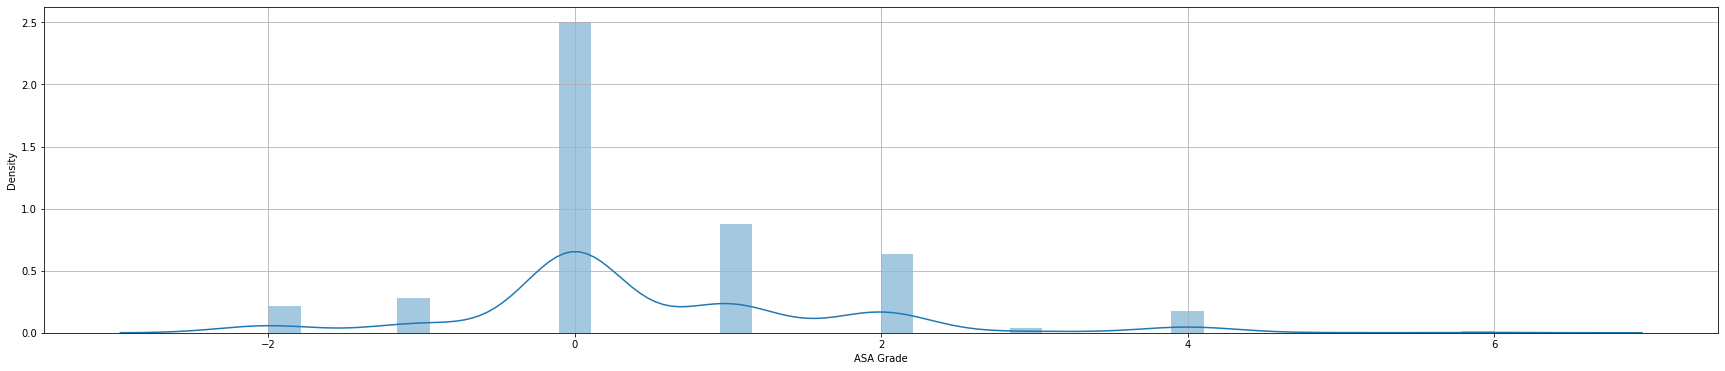

In [141]:
# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 5)]


# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
randomforest_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=30, n_jobs = 1)
randomforest_random.fit(x_train,y_train)


randomforest_random.best_params_

predictions=randomforest_random.predict(x_test)
sns.distplot(y_test-predictions)



model_name.append("Random Forest Classifier")

train_prediction=randomforest_random.predict(x_train)
test_prediction=randomforest_random.predict(x_test)

train_acc.append(float(accuracy_score(y_train,train_prediction)))
test_acc.append(float(accuracy_score(y_test,test_prediction)))

train_precision.append(float(precision_score(y_train,train_prediction,average='micro')))
test_precision.append(float(precision_score(y_test,test_prediction,average='micro')))

train_recall.append(float(recall_score(y_train,train_prediction,average='micro')))
test_recall.append(float(recall_score(y_test,test_prediction,average='micro')))

train_f1.append(float(f1_score(y_train,train_prediction,average='macro')))
test_f1.append(float(f1_score(y_test,test_prediction,average='macro')))

print(confusion_matrix(y_test,predictions))

print("Accuracy: ",accuracy_score(y_test,predictions))
print("Precision Score : ",precision_score(y_test, predictions, pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_test, predictions, 
                                           pos_label='positive'
                                           ,average='micro'))
print('F1 score : ',f1_score(y_test, predictions, average='macro'))

In [142]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)
preds_gbc = gbc.predict(x_test)


model_name.append("Gradient Boosting Classifier")

train_prediction=gbc.predict(x_train)
test_prediction=gbc.predict(x_test)

train_acc.append(float(accuracy_score(y_train,train_prediction)))
test_acc.append(float(accuracy_score(y_test,test_prediction)))

train_precision.append(float(precision_score(y_train,train_prediction,average='micro')))
test_precision.append(float(precision_score(y_test,test_prediction,average='micro')))

train_recall.append(float(recall_score(y_train,train_prediction,average='micro')))
test_recall.append(float(recall_score(y_test,test_prediction,average='micro')))

train_f1.append(float(f1_score(y_train,train_prediction, average='macro')))
test_f1.append(float(f1_score(y_test,test_prediction, average='macro')))


print(confusion_matrix(y_test,preds_gbc))

print("Accuracy: ",accuracy_score(y_test,preds_gbc))
print("Precision Score : ",precision_score(y_test, preds_gbc, pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_test, preds_gbc, 
                                           pos_label='positive'
                                           ,average='micro'))
print('F1 score : ',f1_score(y_test, preds_gbc, average='macro'))

[[205  27  50   0   8   6   0]
 [ 56  96  24   2   0   5   0]
 [ 81  83  89   2   2   5   0]
 [  6   7  13   1   0   0   0]
 [ 22   0   4   1   3   1   0]
 [  0   5   1   0   0   0   0]
 [  2   0   0   0   0   0   0]]
Accuracy:  0.4882280049566295
Precision Score :  0.4882280049566295
Recall Score :  0.4882280049566295
F1 score :  0.2416215733789589


In [143]:
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

model_name.append("MLP Classifier")

train_prediction=classifier.predict(x_train)
test_prediction=classifier.predict(x_test)

train_acc.append(float(accuracy_score(y_train,train_prediction)))
test_acc.append(float(accuracy_score(y_test,test_prediction)))

train_precision.append(float(precision_score(y_train,train_prediction,average='micro')))
test_precision.append(float(precision_score(y_test,test_prediction,average='micro')))

train_recall.append(float(recall_score(y_train,train_prediction,average='micro')))
test_recall.append(float(recall_score(y_test,test_prediction,average='micro')))

train_f1.append(float(f1_score(y_train,train_prediction,average='macro')))
test_f1.append(float(f1_score(y_test,test_prediction,average='macro')))

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))
print('F1 score : ',f1_score(y_test, y_pred, average='macro'))

Accuracy:  0.4399008674101611
Precision Score :  0.4399008674101611
Recall Score :  0.4399008674101611
F1 score :  0.2320183920521706


AGE                                0.078929
Anaesthesia                        0.071222
AMTS pre-op                        0.070422
Specialist falls assessment        0.067843
TYPE_OF_OPERATION                  0.066636
Pre-fracture mobility              0.059888
Reason 36 hrs                      0.056569
Bone protection medication         0.055846
Grade of senior surgeon present    0.054199
CIVIL_STATUS                       0.052868
dtype: float64


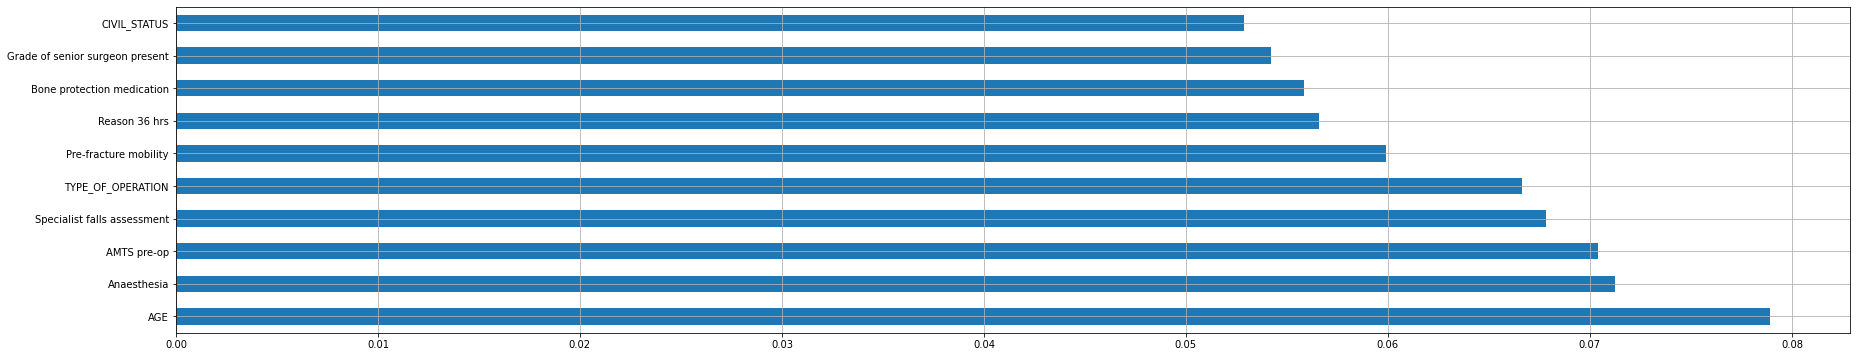

In [144]:
#checking for the important features of a dataset
from sklearn.ensemble import ExtraTreesClassifier

trees = ExtraTreesClassifier()
trees.fit(x,y)
feature_imp = pd.Series(trees.feature_importances_,index=x.columns)
print(feature_imp.nlargest(10))
feature_imp.nlargest(10).plot(kind='barh')
plt.show()

In [146]:
results_without_oversampling = pd.DataFrame({"Model Name":model_name, "Train Accuracy":train_acc, "Test Accuracy":test_acc, "Train Precision":train_precision,
                                       "Test Precision":test_precision, "Train Recall":train_recall, "Test Recall":test_recall,
                                       "Trrain F1 scroe":train_f1, "Test F1 score":test_f1})

**10 IMPORTANT FEATURES MODEL** 

In [147]:
Features = ['AGE','AMTS pre-op','Anaesthesia','Specialist falls assessment','TYPE_OF_OPERATION','Pre-fracture mobility','Bone protection medication','Reason 36 hrs',
'Grade of senior surgeon present','CIVIL_STATUS']

In [148]:
x = plot_df[Features]
y = plot_df['ASA Grade']
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [149]:
y.value_counts()

0.0    1007
2.0     765
1.0     656
4.0     134
3.0      89
5.0      30
6.0       6
Name: ASA Grade, dtype: int64

As the Target varibale is imbalanced we have to apply Over sampling techniques

In [150]:
#Random over sampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
x,y = ros.fit_resample(x,y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [151]:
y.value_counts()

2.0    1007
0.0    1007
1.0    1007
3.0    1007
4.0    1007
5.0    1007
6.0    1007
Name: ASA Grade, dtype: int64

In [152]:
 x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [153]:
model_name = []

train_acc = []
test_acc = []

train_precision = []
test_precision = []

train_recall = []
test_recall = []

train_f1 = []
test_f1 = []

In [154]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score,accuracy_score,fbeta_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

sgd = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))

sgd_a = sgd.fit(x_train,y_train)
prediction_sgd = sgd_a.predict(x_test)
print(confusion_matrix(y_test,prediction_sgd))

model_name.append("SGD Classifier")

train_prediction=sgd_a.predict(x_train)
test_prediction=sgd_a.predict(x_test)

train_acc.append(float(accuracy_score(y_train,train_prediction)))
test_acc.append(float(accuracy_score(y_test,test_prediction)))

train_precision.append(float(precision_score(y_train,train_prediction,average='micro')))
test_precision.append(float(precision_score(y_test,test_prediction,average='micro')))

train_recall.append(float(recall_score(y_train,train_prediction,average='micro')))
test_recall.append(float(recall_score(y_test,test_prediction,average='micro')))

train_f1.append(float(f1_score(y_train,train_prediction,average='macro')))
test_f1.append(float(f1_score(y_test,test_prediction,average='macro')))


print("Accuracy: ",accuracy_score(y_test,prediction_sgd))
print("Precision Score : ",precision_score(y_test, prediction_sgd, pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_test, prediction_sgd, 
                                           pos_label='positive'
                                           ,average='micro'))
print('F1 score : ',f1_score(y_test, prediction_sgd, average='macro'))

[[ 69  49  57  14   3  43  53]
 [ 32  74  81  25   4  51  38]
 [ 34  49 125  27   7  42  23]
 [ 27  56  98  62   0  50  14]
 [ 81  44  37  16  20  34  65]
 [ 35  77  39  28   0 115  20]
 [  0   0   0   0   0  43 254]]
Accuracy:  0.3399527186761229
Precision Score :  0.3399527186761229
Recall Score :  0.3399527186761229
F1 score :  0.3118782049935958


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 11, 17, 23, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=23, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   2.8s
[CV] END max_depth=23, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   2.8s
[CV] END max_depth=23, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   2.9s
[CV] END max_depth=23, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   3.7s
[CV] END max_depth=23, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   2.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total 

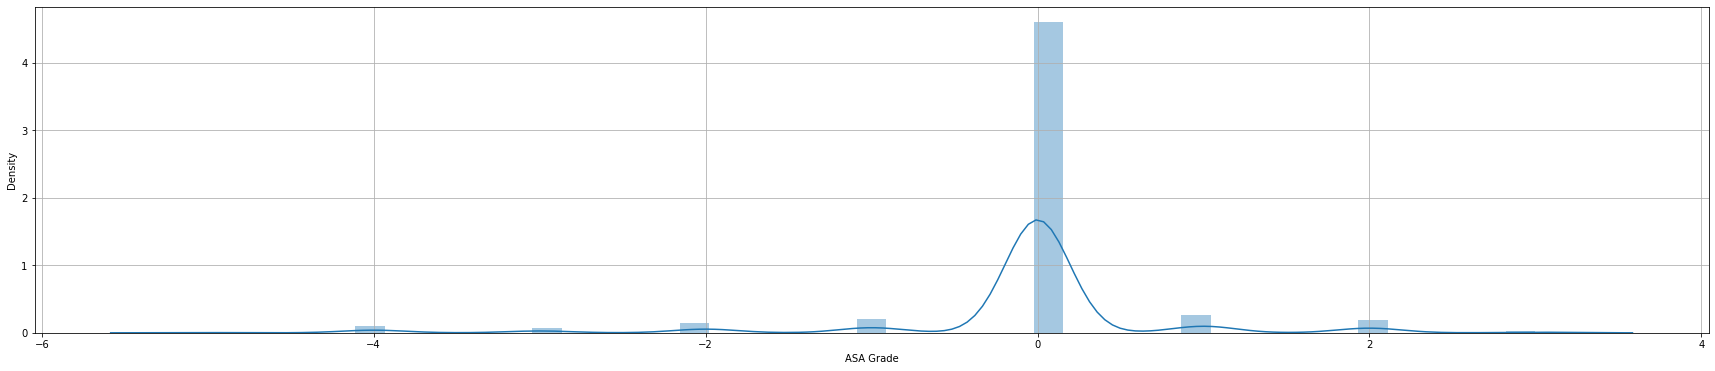

In [155]:
# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 5)]


# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
randomforest_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=30, n_jobs = 1)
randomforest_random.fit(x_train,y_train)


randomforest_random.best_params_

predictions=randomforest_random.predict(x_test)
sns.distplot(y_test-predictions)



model_name.append("Random Forest Classifier")

train_prediction=randomforest_random.predict(x_train)
test_prediction=randomforest_random.predict(x_test)

train_acc.append(float(accuracy_score(y_train,train_prediction)))
test_acc.append(float(accuracy_score(y_test,test_prediction)))

train_precision.append(float(precision_score(y_train,train_prediction,average='micro')))
test_precision.append(float(precision_score(y_test,test_prediction,average='micro')))

train_recall.append(float(recall_score(y_train,train_prediction,average='micro')))
test_recall.append(float(recall_score(y_test,test_prediction,average='micro')))

train_f1.append(float(f1_score(y_train,train_prediction,average='macro')))
test_f1.append(float(f1_score(y_test,test_prediction,average='macro')))

print(confusion_matrix(y_test,predictions))

print("Accuracy: ",accuracy_score(y_test,predictions))
print("Precision Score : ",precision_score(y_test, predictions, pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_test, predictions, 
                                           pos_label='positive'
                                           ,average='micro'))
print('F1 score : ',f1_score(y_test, predictions, average='macro'))

In [156]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)
preds_gbc = gbc.predict(x_test)


model_name.append("Gradient Boosting Classifier")

train_prediction=gbc.predict(x_train)
test_prediction=gbc.predict(x_test)

train_acc.append(float(accuracy_score(y_train,train_prediction)))
test_acc.append(float(accuracy_score(y_test,test_prediction)))

train_precision.append(float(precision_score(y_train,train_prediction,average='micro')))
test_precision.append(float(precision_score(y_test,test_prediction,average='micro')))

train_recall.append(float(recall_score(y_train,train_prediction,average='micro')))
test_recall.append(float(recall_score(y_test,test_prediction,average='micro')))

train_f1.append(float(f1_score(y_train,train_prediction, average='macro')))
test_f1.append(float(f1_score(y_test,test_prediction, average='macro')))


print(confusion_matrix(y_test,preds_gbc))

print("Accuracy: ",accuracy_score(y_test,preds_gbc))
print("Precision Score : ",precision_score(y_test, preds_gbc, pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_test, preds_gbc, 
                                           pos_label='positive'
                                           ,average='micro'))
print('F1 score : ',f1_score(y_test, preds_gbc, average='macro'))

[[118  26  43  12  77   6   6]
 [ 34 112  50  25  33  45   6]
 [ 59  70  70  61  30  16   1]
 [ 11  22  57 208   2   7   0]
 [ 53   7  11  14 206   6   0]
 [  0   0   0   0   0 314   0]
 [  0   0   0   0   0   0 297]]
Accuracy:  0.6264775413711584
Precision Score :  0.6264775413711584
Recall Score :  0.6264775413711584
F1 score :  0.6086450770497157


In [157]:
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

model_name.append("MLP Classifier")

train_prediction=classifier.predict(x_train)
test_prediction=classifier.predict(x_test)

train_acc.append(float(accuracy_score(y_train,train_prediction)))
test_acc.append(float(accuracy_score(y_test,test_prediction)))

train_precision.append(float(precision_score(y_train,train_prediction,average='micro')))
test_precision.append(float(precision_score(y_test,test_prediction,average='micro')))

train_recall.append(float(recall_score(y_train,train_prediction,average='micro')))
test_recall.append(float(recall_score(y_test,test_prediction,average='micro')))

train_f1.append(float(f1_score(y_train,train_prediction,average='macro')))
test_f1.append(float(f1_score(y_test,test_prediction,average='macro')))

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))
print('F1 score : ',f1_score(y_test, y_pred, average='macro'))

Accuracy:  0.8018912529550828
Precision Score :  0.8018912529550828
Recall Score :  0.8018912529550828
F1 score :  0.792264231893696


In [158]:
results_random_oversampling = pd.DataFrame({"Model Name":model_name, "Train Accuracy":train_acc, "Test Accuracy":test_acc, "Train Precision":train_precision,
                                       "Test Precision":test_precision, "Train Recall":train_recall, "Test Recall":test_recall,
                                       "Trrain F1 scroe":train_f1, "Test F1 score":test_f1})

In [159]:
model_name = []

train_acc = []
test_acc = []

train_precision = []
test_precision = []

train_recall = []
test_recall = []

train_f1 = []
test_f1 = []


In [160]:
#SMOTE Oversampling

# SPlitting data
from sklearn.model_selection import train_test_split
# from tensorflow.keras.utils import to_categorical

x = plot_df[Features]
y = plot_df['ASA Grade']
from imblearn.over_sampling import SMOTE
sm =  SMOTE()
x,y = sm.fit_resample(x,y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [161]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score,accuracy_score,fbeta_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

sgd = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))

sgd_a = sgd.fit(x_train,y_train)
prediction_sgd = sgd_a.predict(x_test)
print(confusion_matrix(y_test,prediction_sgd))

model_name.append("SGD Classifier")

train_prediction=sgd_a.predict(x_train)
test_prediction=sgd_a.predict(x_test)

train_acc.append(float(accuracy_score(y_train,train_prediction)))
test_acc.append(float(accuracy_score(y_test,test_prediction)))

train_precision.append(float(precision_score(y_train,train_prediction,average='micro')))
test_precision.append(float(precision_score(y_test,test_prediction,average='micro')))

train_recall.append(float(recall_score(y_train,train_prediction,average='micro')))
test_recall.append(float(recall_score(y_test,test_prediction,average='micro')))

train_f1.append(float(f1_score(y_train,train_prediction,average='macro')))
test_f1.append(float(f1_score(y_test,test_prediction,average='macro')))


print("Accuracy: ",accuracy_score(y_test,prediction_sgd))
print("Precision Score : ",precision_score(y_test, prediction_sgd, pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_test, prediction_sgd, 
                                           pos_label='positive'
                                           ,average='micro'))
print('F1 score : ',f1_score(y_test, prediction_sgd, average='macro'))

[[ 26  47  45  27  16  54  68]
 [ 15  94  52  64  14  45  39]
 [ 16  93  63  63  11  36  32]
 [  6  47  53 122   0  45  18]
 [ 24  41  54  36  61  38  63]
 [  2  64  58  73  15  69  14]
 [  0   0   0   0   0   0 292]]
Accuracy:  0.3437352245862884
Precision Score :  0.3437352245862884
Recall Score :  0.3437352245862884
F1 score :  0.31360468769077726


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=23, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   5.2s
[CV] END max_depth=23, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   5.4s
[CV] END max_depth=23, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   4.9s
[CV] END max_depth=23, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   4.9s
[CV] END max_depth=23, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   4.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimator

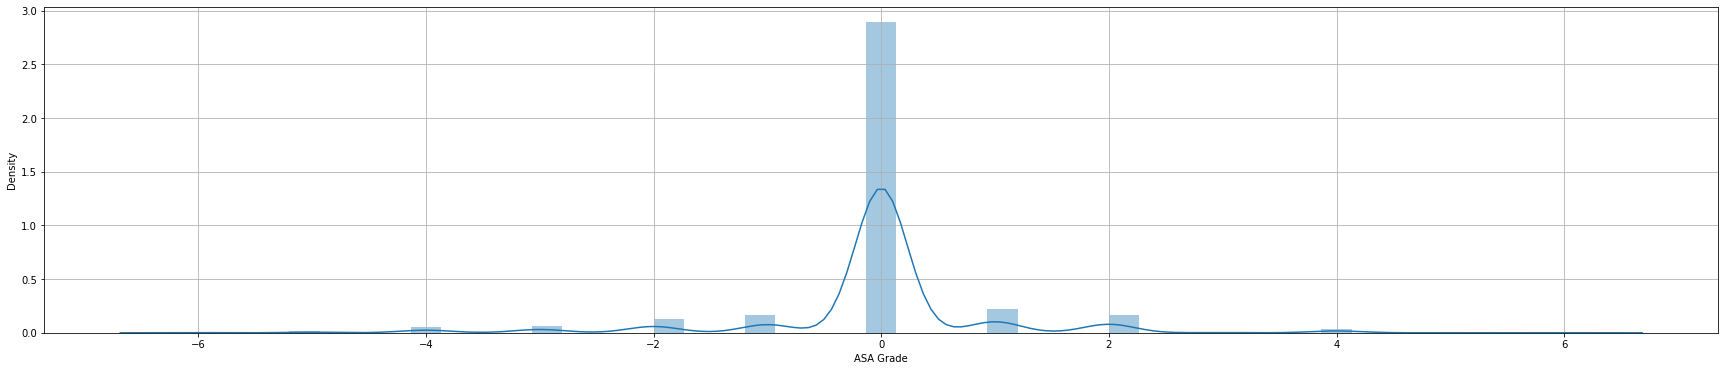

In [162]:
# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 5)]


# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
randomforest_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=30, n_jobs = 1)
randomforest_random.fit(x_train,y_train)


randomforest_random.best_params_

predictions=randomforest_random.predict(x_test)
sns.distplot(y_test-predictions)



model_name.append("Random Forest Classifier")

train_prediction=randomforest_random.predict(x_train)
test_prediction=randomforest_random.predict(x_test)

train_acc.append(float(accuracy_score(y_train,train_prediction)))
test_acc.append(float(accuracy_score(y_test,test_prediction)))

train_precision.append(float(precision_score(y_train,train_prediction,average='micro')))
test_precision.append(float(precision_score(y_test,test_prediction,average='micro')))

train_recall.append(float(recall_score(y_train,train_prediction,average='micro')))
test_recall.append(float(recall_score(y_test,test_prediction,average='micro')))

train_f1.append(float(f1_score(y_train,train_prediction,average='macro')))
test_f1.append(float(f1_score(y_test,test_prediction,average='macro')))

print(confusion_matrix(y_test,predictions))

print("Accuracy: ",accuracy_score(y_test,predictions))
print("Precision Score : ",precision_score(y_test, predictions, pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_test, predictions, 
                                           pos_label='positive'
                                           ,average='micro'))
print('F1 score : ',f1_score(y_test, predictions, average='macro'))

In [163]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)
preds_gbc = gbc.predict(x_test)


model_name.append("Gradient Boosting Classifier")

train_prediction=gbc.predict(x_train)
test_prediction=gbc.predict(x_test)

train_acc.append(float(accuracy_score(y_train,train_prediction)))
test_acc.append(float(accuracy_score(y_test,test_prediction)))

train_precision.append(float(precision_score(y_train,train_prediction,average='micro')))
test_precision.append(float(precision_score(y_test,test_prediction,average='micro')))

train_recall.append(float(recall_score(y_train,train_prediction,average='micro')))
test_recall.append(float(recall_score(y_test,test_prediction,average='micro')))

train_f1.append(float(f1_score(y_train,train_prediction, average='macro')))
test_f1.append(float(f1_score(y_test,test_prediction, average='macro')))


print(confusion_matrix(y_test,preds_gbc))

print("Accuracy: ",accuracy_score(y_test,preds_gbc))
print("Precision Score : ",precision_score(y_test, preds_gbc, pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_test, preds_gbc, 
                                           pos_label='positive'
                                           ,average='micro'))
print('F1 score : ',f1_score(y_test, preds_gbc, average='macro'))

[[170  28  38  10  23   7   7]
 [ 45  88  90  26  33  35   6]
 [ 82  49  98  52  19  13   1]
 [  6  17  31 185  20  31   1]
 [ 34   7  10  16 214  24  12]
 [  3  10   7  10  14 251   0]
 [  3   0   0   0   2   0 287]]
Accuracy:  0.6113475177304964
Precision Score :  0.6113475177304964
Recall Score :  0.6113475177304964
F1 score :  0.6028361439074226


In [164]:
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

model_name.append("MLP Classifier")

train_prediction=classifier.predict(x_train)
test_prediction=classifier.predict(x_test)

train_acc.append(float(accuracy_score(y_train,train_prediction)))
test_acc.append(float(accuracy_score(y_test,test_prediction)))

train_precision.append(float(precision_score(y_train,train_prediction,average='micro')))
test_precision.append(float(precision_score(y_test,test_prediction,average='micro')))

train_recall.append(float(recall_score(y_train,train_prediction,average='micro')))
test_recall.append(float(recall_score(y_test,test_prediction,average='micro')))

train_f1.append(float(f1_score(y_train,train_prediction,average='macro')))
test_f1.append(float(f1_score(y_test,test_prediction,average='macro')))

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))
print('F1 score : ',f1_score(y_test, y_pred, average='macro'))

Accuracy:  0.7645390070921986
Precision Score :  0.7645390070921986
Recall Score :  0.7645390070921986
F1 score :  0.7584253988462715


In [165]:
results_Smote_oversampling = pd.DataFrame({"Model Name":model_name, "Train Accuracy":train_acc, "Test Accuracy":test_acc, "Train Precision":train_precision,
                                       "Test Precision":test_precision, "Train Recall":train_recall, "Test Recall":test_recall,
                                       "Trrain F1 scroe":train_f1, "Test F1 score":test_f1})

1. Results without oversampling
2. Results with random oversampling
3. Results with smooth oversampling



In [166]:
results_without_oversampling

,Model Name,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Trrain F1 scroe,Test F1 score
0,SGD Classifier,0.440957,0.392813,0.440957,0.392813,0.440957,0.392813,0.290418,0.166297
1,Random Forest Classifier,0.798404,0.526642,0.798404,0.526642,0.798404,0.526642,0.665147,0.224053
2,Gradient Boosting Classifier,0.535638,0.488228,0.535638,0.488228,0.535638,0.488228,0.344459,0.241622
3,MLP Classifier,0.994149,0.439901,0.994149,0.439901,0.994149,0.439901,0.995074,0.232018


In [167]:
results_random_oversampling

,Model Name,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Trrain F1 scroe,Test F1 score
0,SGD Classifier,0.326105,0.339953,0.326105,0.339953,0.326105,0.339953,0.300215,0.311878
1,Random Forest Classifier,0.923794,0.817967,0.923794,0.817967,0.923794,0.817967,0.922909,0.809131
2,Gradient Boosting Classifier,0.652615,0.626478,0.652615,0.626478,0.652615,0.626478,0.638921,0.608645
3,MLP Classifier,0.959262,0.801891,0.959262,0.801891,0.959262,0.801891,0.959293,0.792264


In [168]:
results_Smote_oversampling

,Model Name,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Trrain F1 scroe,Test F1 score
0,SGD Classifier,0.366234,0.343735,0.366234,0.343735,0.366234,0.343735,0.335866,0.313605
1,Random Forest Classifier,0.929672,0.771158,0.929672,0.771158,0.929672,0.771158,0.928476,0.764919
2,Gradient Boosting Classifier,0.677341,0.611348,0.677341,0.611348,0.677341,0.611348,0.666352,0.602836
3,MLP Classifier,0.962708,0.764539,0.962708,0.764539,0.962708,0.764539,0.962619,0.758425


# **Plots**

# **Plots for model without oversampling**

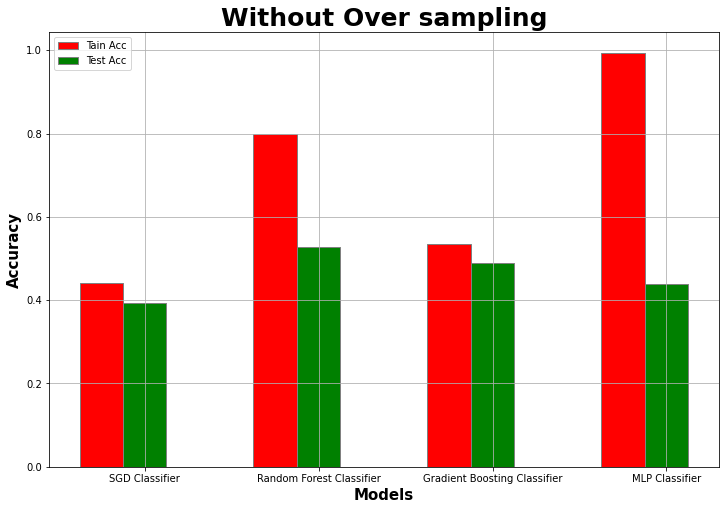

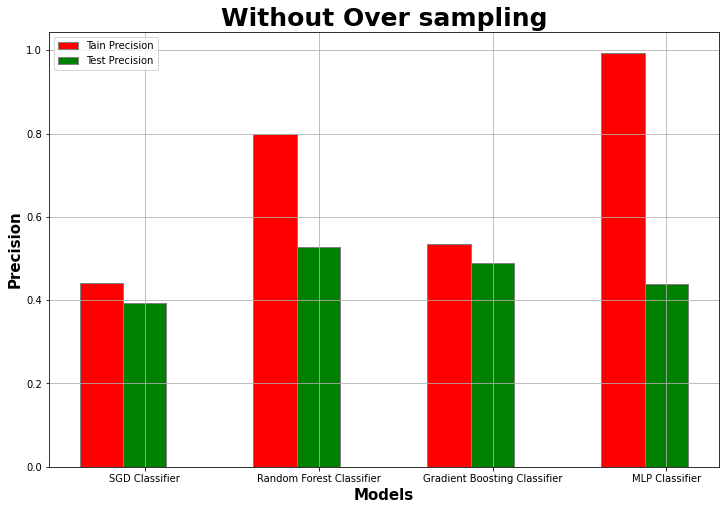

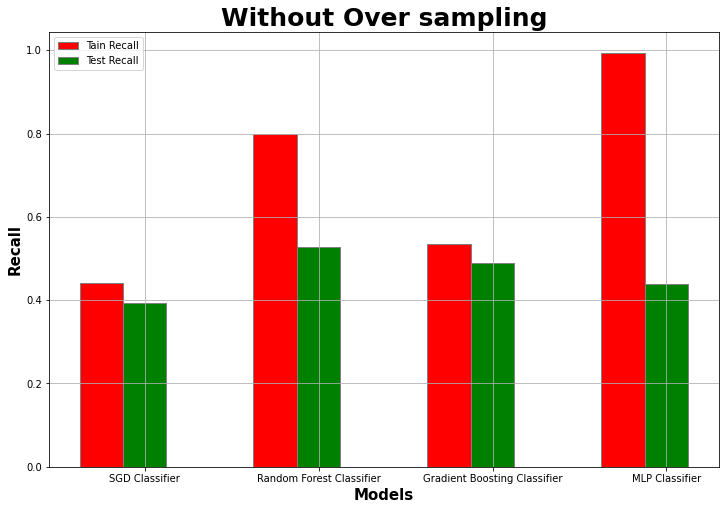

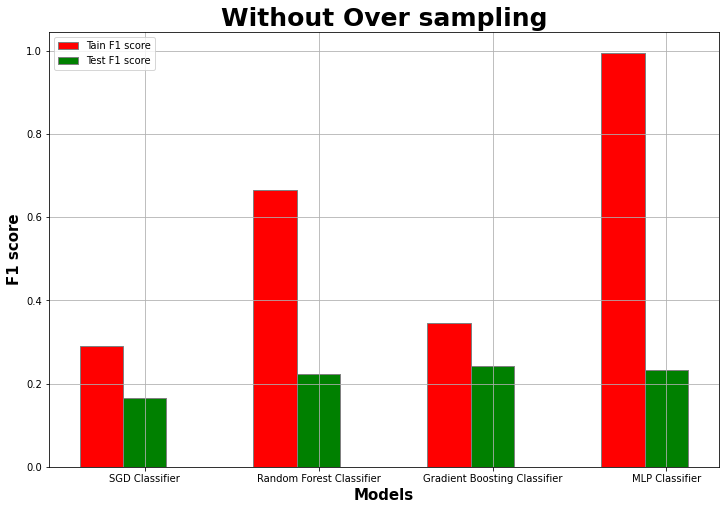

In [169]:
# Accuracy
train_acc = results_without_oversampling['Train Accuracy'].values
test_acc = results_without_oversampling['Test Accuracy'].values
m_name = results_without_oversampling['Model Name'].values

barWidth = 0.25

fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(train_acc))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, train_acc, color ='r', width = barWidth,
        edgecolor ='grey', label ='Tain Acc')
plt.bar(br2, test_acc, color ='g', width = barWidth,
        edgecolor ='grey', label ='Test Acc')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(train_acc))], m_name)
plt.title('Without Over sampling',fontweight ='bold', fontsize = 25)
plt.legend()
plt.show()

# Precision

train_pre = results_without_oversampling['Train Precision'].values
test_pre = results_without_oversampling['Test Precision'].values

barWidth = 0.25

fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(train_acc))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, train_pre, color ='r', width = barWidth,
        edgecolor ='grey', label ='Tain Precision')
plt.bar(br2, test_pre, color ='g', width = barWidth,
        edgecolor ='grey', label ='Test Precision')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Precision', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(train_acc))], m_name)
plt.title('Without Over sampling',fontweight ='bold', fontsize = 25)
plt.legend()
plt.show()

# Recall
train_r = results_without_oversampling['Train Recall'].values
test_r = results_without_oversampling['Test Recall'].values

barWidth = 0.25

fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(train_acc))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, train_r, color ='r', width = barWidth,
        edgecolor ='grey', label ='Tain Recall')
plt.bar(br2, test_r, color ='g', width = barWidth,
        edgecolor ='grey', label ='Test Recall')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Recall', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(train_acc))], m_name)
plt.title('Without Over sampling',fontweight ='bold', fontsize = 25)
plt.legend()
plt.show()

# F1

train_f1 = results_without_oversampling['Trrain F1 scroe'].values
test_f1 = results_without_oversampling['Test F1 score'].values

barWidth = 0.25

fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(train_acc))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, train_f1, color ='r', width = barWidth,
        edgecolor ='grey', label ='Tain F1 score')
plt.bar(br2, test_f1, color ='g', width = barWidth,
        edgecolor ='grey', label ='Test F1 score')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('F1 score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(train_acc))], m_name)
plt.title('Without Over sampling',fontweight ='bold', fontsize = 25)
plt.legend()
plt.show()

## **Plots for Results Random Oversampling**

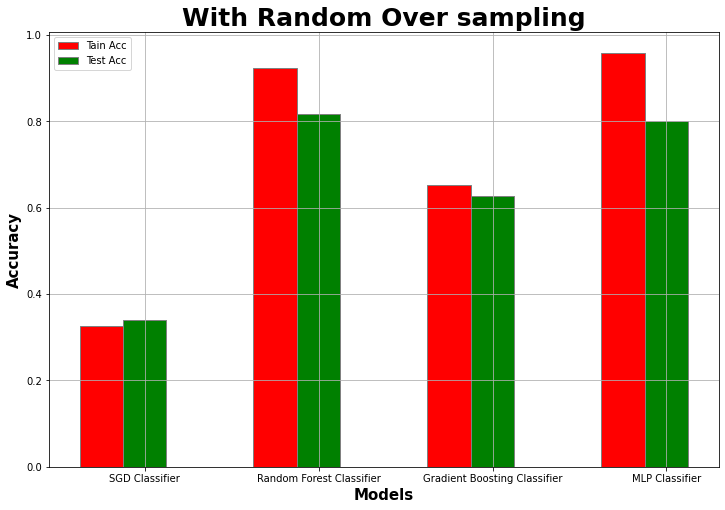

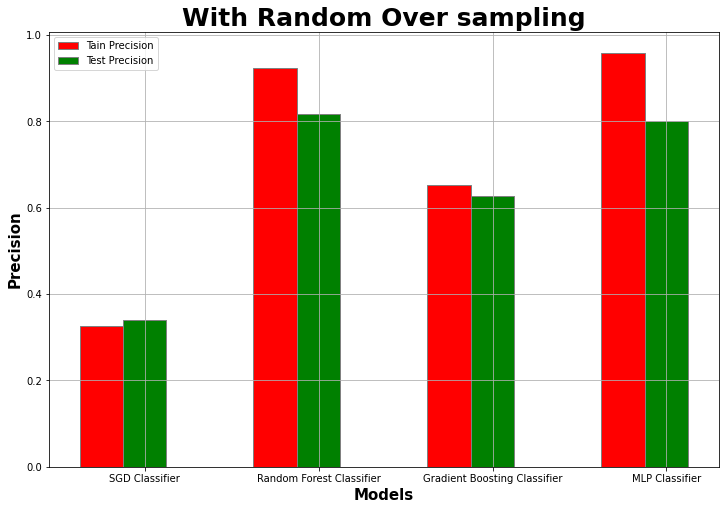

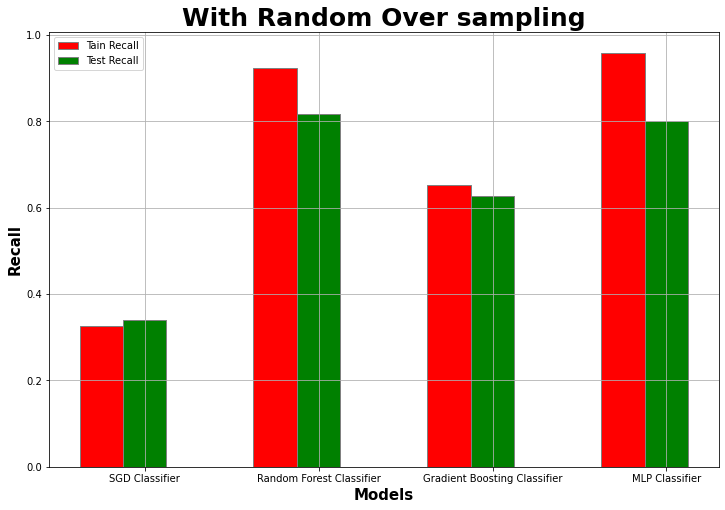

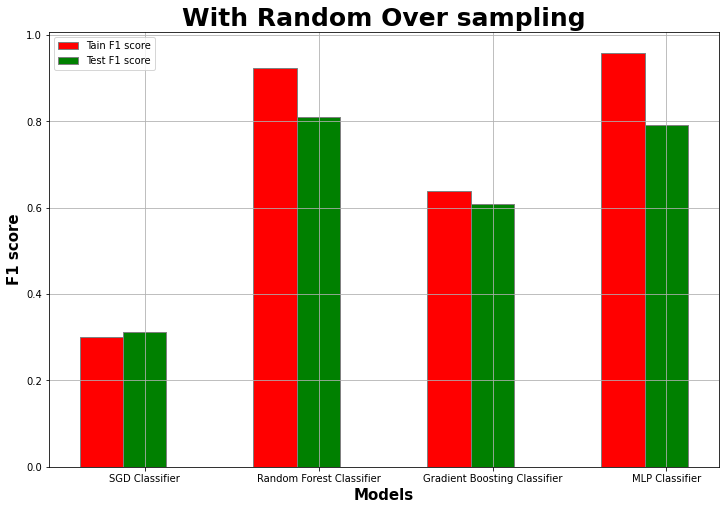

In [170]:
# Accuracy
train_acc = results_random_oversampling['Train Accuracy'].values
test_acc = results_random_oversampling['Test Accuracy'].values
m_name = results_random_oversampling['Model Name'].values

barWidth = 0.25

fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(train_acc))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, train_acc, color ='r', width = barWidth,
        edgecolor ='grey', label ='Tain Acc')
plt.bar(br2, test_acc, color ='g', width = barWidth,
        edgecolor ='grey', label ='Test Acc')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(train_acc))], m_name)
plt.title('With Random Over sampling',fontweight ='bold', fontsize = 25)
plt.legend()
plt.show()

# Precision

train_pre = results_random_oversampling['Train Precision'].values
test_pre = results_random_oversampling['Test Precision'].values

barWidth = 0.25

fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(train_acc))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, train_pre, color ='r', width = barWidth,
        edgecolor ='grey', label ='Tain Precision')
plt.bar(br2, test_pre, color ='g', width = barWidth,
        edgecolor ='grey', label ='Test Precision')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Precision', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(train_acc))], m_name)
plt.title('With Random Over sampling',fontweight ='bold', fontsize = 25)
plt.legend()
plt.show()

# Recall
train_r = results_random_oversampling['Train Recall'].values
test_r = results_random_oversampling['Test Recall'].values

barWidth = 0.25

fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(train_acc))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, train_r, color ='r', width = barWidth,
        edgecolor ='grey', label ='Tain Recall')
plt.bar(br2, test_r, color ='g', width = barWidth,
        edgecolor ='grey', label ='Test Recall')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Recall', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(train_acc))], m_name)
plt.title('With Random Over sampling',fontweight ='bold', fontsize = 25)
plt.legend()
plt.show()

# F1

train_f1 = results_random_oversampling['Trrain F1 scroe'].values
test_f1 = results_random_oversampling['Test F1 score'].values

barWidth = 0.25

fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(train_acc))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, train_f1, color ='r', width = barWidth,
        edgecolor ='grey', label ='Tain F1 score')
plt.bar(br2, test_f1, color ='g', width = barWidth,
        edgecolor ='grey', label ='Test F1 score')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('F1 score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(train_acc))], m_name)
plt.title('With Random Over sampling',fontweight ='bold', fontsize = 25)
plt.legend()
plt.show()

**Plots for Results On Results Smooth Oversampling **

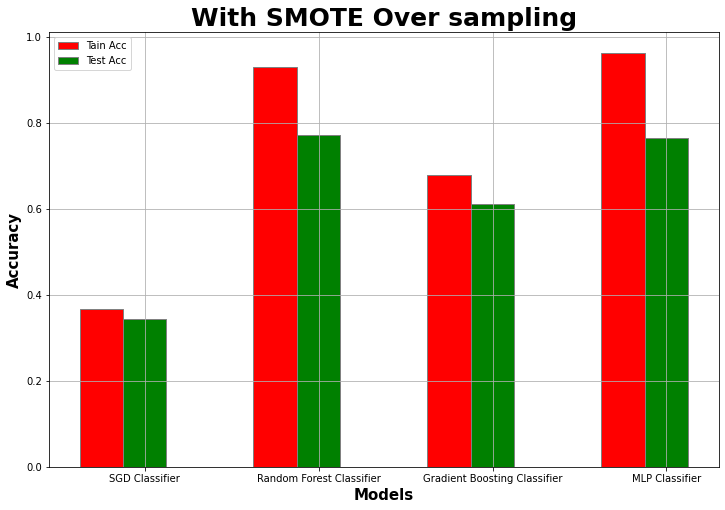

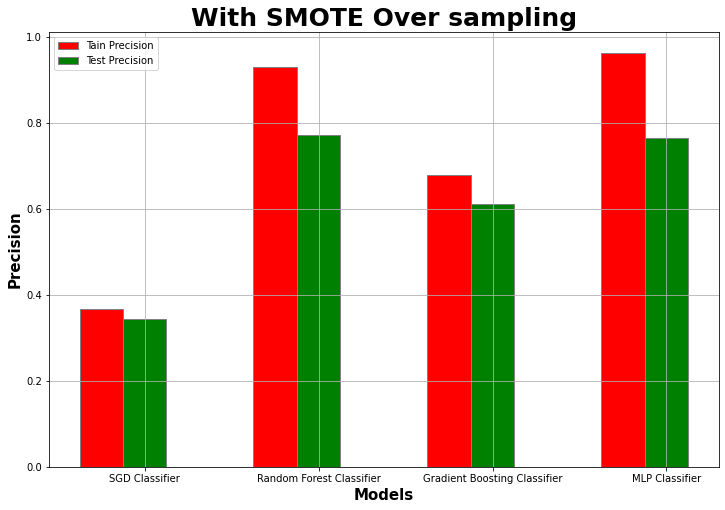

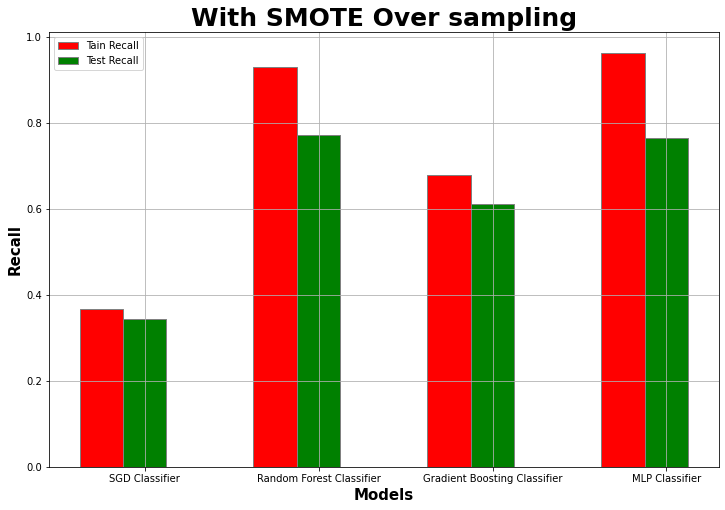

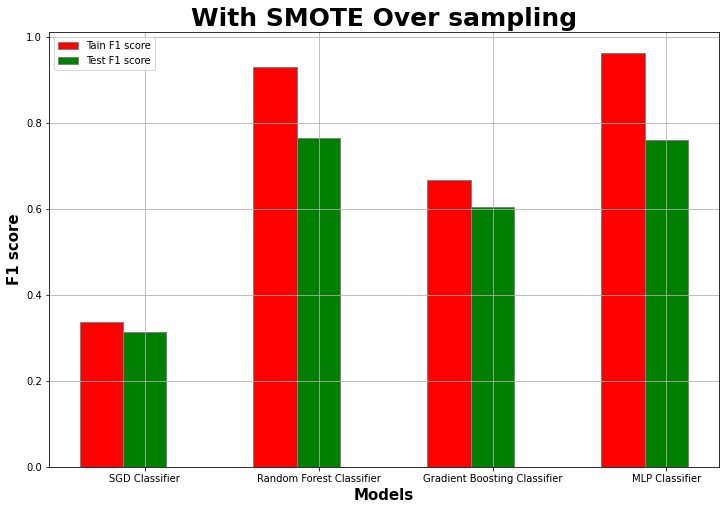

In [171]:
# Accuracy
train_acc = results_Smote_oversampling['Train Accuracy'].values
test_acc = results_Smote_oversampling['Test Accuracy'].values
m_name = results_Smote_oversampling['Model Name'].values

barWidth = 0.25

fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(train_acc))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, train_acc, color ='r', width = barWidth,
        edgecolor ='grey', label ='Tain Acc')
plt.bar(br2, test_acc, color ='g', width = barWidth,
        edgecolor ='grey', label ='Test Acc')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(train_acc))], m_name)
plt.title('With SMOTE Over sampling',fontweight ='bold', fontsize = 25)
plt.legend()
plt.show()

# Precision

train_pre = results_Smote_oversampling['Train Precision'].values
test_pre = results_Smote_oversampling['Test Precision'].values

barWidth = 0.25

fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(train_acc))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, train_pre, color ='r', width = barWidth,
        edgecolor ='grey', label ='Tain Precision')
plt.bar(br2, test_pre, color ='g', width = barWidth,
        edgecolor ='grey', label ='Test Precision')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Precision', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(train_acc))], m_name)
plt.title('With SMOTE Over sampling',fontweight ='bold', fontsize = 25)
plt.legend()
plt.show()

# Recall
train_r = results_Smote_oversampling['Train Recall'].values
test_r = results_Smote_oversampling['Test Recall'].values

barWidth = 0.25

fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(train_acc))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, train_r, color ='r', width = barWidth,
        edgecolor ='grey', label ='Tain Recall')
plt.bar(br2, test_r, color ='g', width = barWidth,
        edgecolor ='grey', label ='Test Recall')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Recall', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(train_acc))], m_name)
plt.title('With SMOTE Over sampling',fontweight ='bold', fontsize = 25)
plt.legend()
plt.show()

# F1

train_f1 = results_Smote_oversampling['Trrain F1 scroe'].values
test_f1 = results_Smote_oversampling['Test F1 score'].values

barWidth = 0.25

fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(train_acc))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, train_f1, color ='r', width = barWidth,
        edgecolor ='grey', label ='Tain F1 score')
plt.bar(br2, test_f1, color ='g', width = barWidth,
        edgecolor ='grey', label ='Test F1 score')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('F1 score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(train_acc))], m_name)
plt.title('With SMOTE Over sampling',fontweight ='bold', fontsize = 25)
plt.legend()
plt.show()